In [4]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from model import *
from data import *
import os
from PIL import Image

In [3]:
%cd drive/My Drive/unet-master

/content/drive/My Drive/unet-master


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [ ]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

""" #params
trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
"""
trainGene = trainGenerator(8,'Training-Splitted/train','Image','Annotation',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit(trainGene,steps_per_epoch=2000 ,epochs=10,callbacks=[model_checkpoint]) #epochs 5 to 1


Found 699 images belonging to 1 classes.
Found 699 images belonging to 1 classes.
Epoch 1/10
   1/2000 [..............................] - ETA: 48:47:13 - loss: 1.6411 - binary_accuracy: 0.9933 - dice_coeff: 0.0125

In [ ]:

model.summary()

NameError: ignored

In [ ]:
model.save("saved_model/trained_model")


NameError: ignored

In [ ]:
new_model = tf.keras.models.load_model('saved_model/trained_model/')

NameError: ignored

In [ ]:
new_model1 = tf.keras.models.load_model('saved_model/unetNoValidation')

### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [ ]:
testGene = testGenerator("data/val/Image/")
new_model1 = unet()
new_model1.load_weights("unet_membrane.hdf5")
results = new_model1.predict_generator(testGene,300,verbose=1)
saveResult("data/val/Annotation/","saved_model/predicted_images7/",results)


<ipython-input-9-d515ec5e8f01>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = new_model1.predict_generator(testGene,300,verbose=1)


300/300 [==============================] - 711s 2s/step


FileNotFoundError: ignored

In [ ]:
# to check if our masking function is working correctly
import numpy as np
fig = plt.figure(figsize = (30,7))
for index in range(7):
  file_path = os.path.join('/content/training_set', train_pixel_file.iloc[index, 0].replace('.png','_Annotation.png'))
  #print(file_path)
  ax = fig.add_subplot(2, 7, index+1)             ## annoted plot
  plt.imshow(cv2.imread(file_path))

  ax = fig.add_subplot(2, 7, index+8)
  plt.imshow(masking(cv2.imread(file_path)))        ## mask plot

In [ ]:
# Here we loop through training set and  take annotations one by one and replace them with corresponding masks
for index in range(len(train_pixel_file)):
    file_path = os.path.join('/content/training_set', train_pixel_file.iloc[index, 0].replace('.png','_Annotation.png'))
    image = cv2.imread(file_path)
    mask = masking(image)
    cv2.imwrite(file_path, mask)

In [ ]:
import matplotlib.pyplot as plt



acc=new_model.history['accuracy']
loss=new_model.history["loss"]
epochs_range = range(epochs)
print("The results are being visualized")
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training  Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training  Loss')
plt.show()

TypeError: ignored

In [5]:

def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true = tf.cast(y_true, dtype=tf.float32)  # Convert labels to float32
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
from skimage import img_as_ubyte
import skimage.io as io
import cv2
import numpy as np
predicted_image_path="saved_model/predicted_images6/"
predicted_image_paths=os.listdir(predicted_image_path)
for f in predicted_image_paths:
    im_pred=cv2.imread(predicted_image_path+f)

    th,pred_binarize=cv2.threshold(im_pred,127,255,cv2.THRESH_BINARY)

    cv2.imwrite(os.path.join(predicted_image_path+f),pred_binarize)


tf.Tensor(0.062600516, shape=(), dtype=float32)


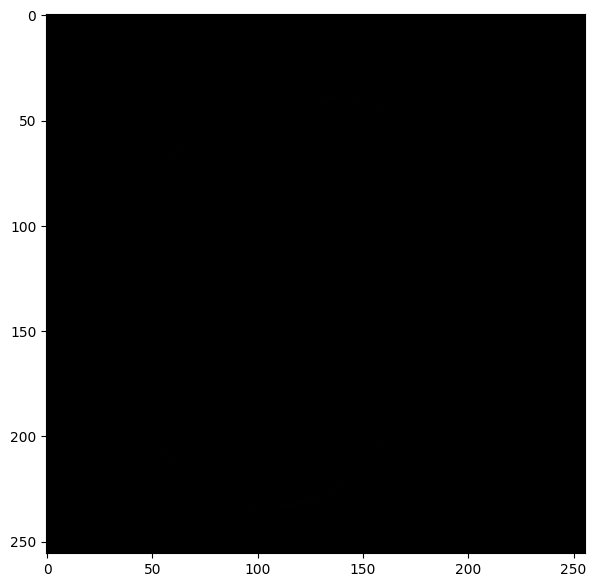

In [18]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (30,7))

total_score=0

test_image_path ="data/val/Annotation/"
predicted_image_path="saved_model/predicted_image7/"

y_true_images=os.listdir(test_image_path)
y_predicted_images=os.listdir(predicted_image_path)
y_true=[]
y_pred=[]
score=[]

for f in sorted(y_true_images):
       im_true=cv2.imread(test_image_path+f)

       plt.imshow(im_true)
       im_true=cv2.resize(im_true, (256,256))
       im_true[im_true>0]=1
       im_true[im_true<=0]=0
       y_true.append(im_true)
for f in sorted(y_predicted_images):
    im_pred=cv2.imread(predicted_image_path+f)
    im_pred[im_pred==255]=1
    plt.imshow( im_pred)
    y_pred.append(im_pred)

for i in range(300):
    score=dice_coeff(y_true[i],y_pred[i])
    total_score=total_score+score
mean_score=total_score/300
print(mean_score)



In [12]:
print(np.unique(im_true))


ValueError: ignored

In [ ]:
def binarize_image(img):
     cv2.threshold(img,127,255,cv2.THRESH_BINARY)

In [ ]:

predicted_image_path="saved_model/predicted_images4/"
fill_labels(predicted_image_path)

